In [8]:
%load_ext rpy2.ipython
# http://people.duke.edu/~ccc14/sta-663/IPythonNotebookIntroduction.html#magic-commands
# https://github.com/mistertooth/statsintro_python/blob/master/ipynb/2_rpy2Intro.ipynb

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [9]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


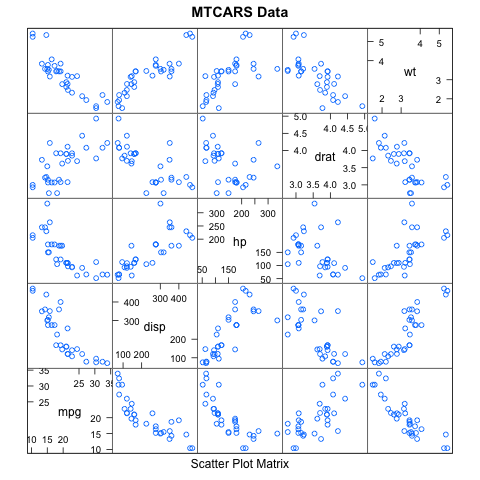

In [3]:
%%R
library(lattice)
attach(mtcars)

# scatterplot matrix
splom(mtcars[c(1,3,4,5,6)], main="MTCARS Data")

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pandas.tools.plotting import scatter_matrix
import pylab

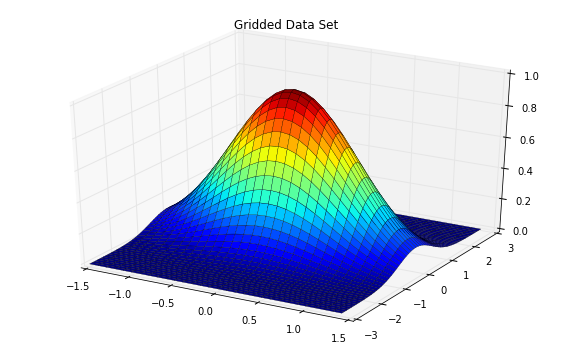

In [6]:
# Next we will do the 3D mesh

xgv = np.arange(-1.5, 1.5, 0.1)
ygv = np.arange(-3, 3, 0.1)
[X,Y] = np.meshgrid(xgv, ygv)
V = np.exp(-(X**2 + Y**2))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V, rstride=1, cstride=1, cmap=plt.cm.jet, linewidth=0.25)
plt.title('Gridded Data Set');

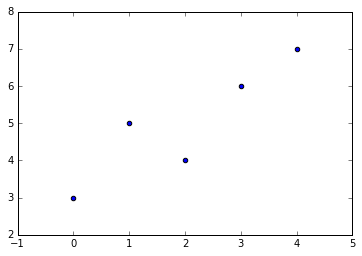

In [10]:
X = np.array([0,1,2,3,4])
Y = np.array([3,5,4,6,7])
pylab.scatter(X, Y)

In [11]:
# push numpy arrays to R

%Rpush X Y
%R lm(Y~X)$coef

array([ 3.2,  0.9])

In [12]:
# return multiple values 

%R resid(lm(Y~X)); coef(lm(X~Y))

array([-2.5,  0.9])

In [17]:
# work around to statistics summary in R not working

In [15]:
%%R
X = c(1,2,3,4,5)
Y = c(1,2,3,6,5)
s = capture.output(summary(lm(Y~X)))

In [16]:
a =%R s
for line in a[2:-1]:
         print(line)

lm(formula = Y ~ X)

Residuals:
         1          2          3          4          5 
 1.166e-15 -2.000e-01 -4.000e-01  1.400e+00 -8.000e-01 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.2000     1.0132  -0.197   0.8561  
X             1.2000     0.3055   3.928   0.0294 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9661 on 3 degrees of freedom
Multiple R-squared:  0.8372,	Adjusted R-squared:  0.7829 
F-statistic: 15.43 on 1 and 3 DF,  p-value: 0.02937


In [19]:
# work around using rpull
b = %R a=resid(lm(Y~X))
%Rpull a
print(a)
assert id(b.data) == id(a.data)
%R -o a

[  1.16573418e-15  -2.00000000e-01  -4.00000000e-01   1.40000000e+00
  -8.00000000e-01]


In [21]:
# equivalent workaround to pull with just -o

%R d=resid(lm(Y~X)); e=coef(lm(Y~X))
%R -o d -o e
%Rpull e
print(d)
print(e)
import numpy as np
np.testing.assert_almost_equal(d, a)

[  1.16573418e-15  -2.00000000e-01  -4.00000000e-01   1.40000000e+00
  -8.00000000e-01]
[-0.2  1.2]


In [22]:
# equivalent workaround to push with just -i
A = np.arange(20)
%R -i A
%R mean(A)

array([ 9.5])

In [23]:
# directly get numpy array with Rget

%Rget A

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32)


Call:
lm(formula = Y ~ X)

Residuals:
         1          2          3          4          5 
 1.166e-15 -2.000e-01 -4.000e-01  1.400e+00 -8.000e-01 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.2000     1.0132  -0.197   0.8561  
X             1.2000     0.3055   3.928   0.0294 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9661 on 3 degrees of freedom
Multiple R-squared:  0.8372,	Adjusted R-squared:  0.7829 
F-statistic: 15.43 on 1 and 3 DF,  p-value: 0.02937



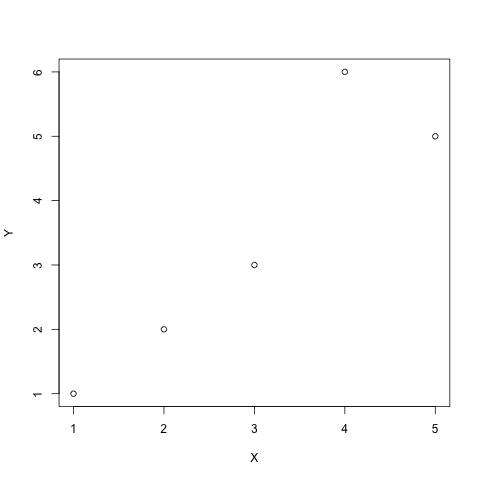

('v1 is:', array([ 10.2]))
('v2 is:', array([ 10.2]))


In [24]:
# 
v1 = %R plot(X,Y); print(summary(lm(Y~X))); vv=mean(X)*mean(Y)
print('v1 is:', v1)
v2 = %R mean(X)*mean(Y)
print('v2 is:', v2)

In [27]:
# %R print(summary(lm(Y~X)))


Call:
lm(formula = Y ~ X)

Residuals:
   1    2    3    4    5 
-0.2  0.9 -1.0  0.1  0.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   3.2000     0.6164   5.191   0.0139 *
X             0.9000     0.2517   3.576   0.0374 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7958 on 3 degrees of freedom
Multiple R-squared:   0.81,	Adjusted R-squared:  0.7467 
F-statistic: 12.79 on 1 and 3 DF,  p-value: 0.03739



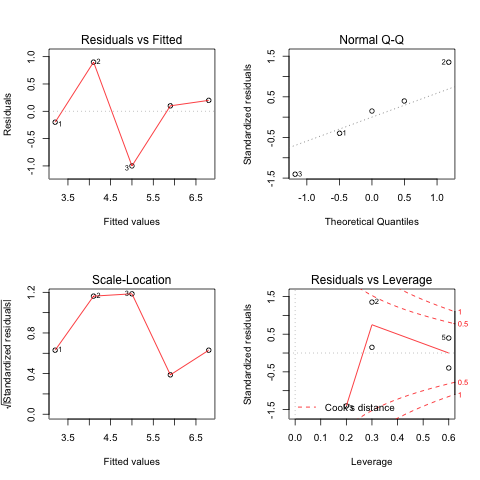

In [28]:
%%R -i X,Y -o XYcoef
XYlm = lm(Y~X)
XYcoef = coef(XYlm)
print(summary(XYlm))
par(mfrow=c(2,2))
plot(XYlm)